In [1]:
from bs4 import BeautifulSoup
import re
from collections import Counter
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer

In [2]:
txt = open('./english.xml', 'r+', encoding='utf8').read()
txt[:100]
len(txt)

13410277

In [3]:
soup = BeautifulSoup(txt)
content = soup.findAll(text=True)
content = [x.lower() for x in list(content) if x != '\n']
len(content)

91988

In [4]:
replaced = [re.sub(r'[\*…]|\.{3}', ' ', x).strip() for x in content if len(x)>1]
replaced = [re.sub(r'[<\[].*?[>\]]|\s?\w*\d|\\|[\.\,\!\%\?\(\)\:\——\_\+\&\$\#\@\|\;\"]', '', x) for x in replaced]
replaced = [re.sub(r'[<\[].*?[>\]]|\s?\w*\d|\\|[\.\,\!\%\?\(\)\:\-—\_\+\&\$\#\@\|\;\"]', '', x) for x in replaced]
replaced = [x for x in replaced if len(x) > 1]

In [5]:
words = ' '.join(replaced).split()
words = [x.replace("'s", "").strip() for x in words if not x.endswith("'") and not x.startswith("'")] # clean 
words = [x for x in words if not "'" in x and not "’" in x]
len(words)

1112342

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\im_hl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
st = WordNetLemmatizer()
lem_words = [st.lemmatize(x) for x in words]
len(lem_words)

1112342

In [8]:
replaced[5000:5100]

['matchetty',
 'heavenly strike',
 'cleanse wounds skillbook',
 'strip armour',
 'turn a nearby target to stone incapacitating it deal  removes bleeding burning poisoned and crippled',
 'devour a corpse to heal and increase damage by ',
 'use  to cycle through the class presets',
 'wolf amulet',
 'glorious ring',
 'sharp stone on a stick',
 'vicious axe',
 "mhordkan's hammer",
 'trained in order obedience and warfare you know the difference between a latrine and a lieutenant',
 'in split screen mode both players still have total freedom and can rotate their cameras individually',
 'large venom rune',
 'trusty twohander',
 'win a series of rock paper scissors matches to convince the other party put points in charisma to gain an advantage press  to skip the rps',
 'battle helm',
 'ricochet skillbook',
 'bark at the rune flame rune',
 'farsight infusion skillbook',
 'you are now sworn you no longer possess the bless skill instead you possess the curse skill',
 'basic selection',
 'love gr

In [9]:
fp = open('english_text.txt', 'w', encoding='utf8')
fp.writelines(replaced)
fp.close()

fp = open('origin.txt', 'w', encoding='utf8')
fp.writelines(content)
fp.close()

In [10]:
counter = Counter(lem_words)
print('Unique words:', len(counter.keys()))
print(counter.most_common()[-50:])

Unique words: 24678
[('unabashed', 1), ('humongous', 1), ('mare', 1), ('mawsopen', 1), ('compress', 1), ('immortalize', 1), ('conquering', 1), ('unexistent', 1), ('selfproclaimed', 1), ('pathetically', 1), ('resebles', 1), ('preens', 1), ('blasphemous', 1), ('pavement', 1), ('taskmistress', 1), ('ughhh', 1), ('snakemouth', 1), ('relenting', 1), ('unshackled', 1), ('labored', 1), ('weakminded', 1), ('orblike', 1), ('materialized', 1), ('twolegged', 1), ('suffuse', 1), ('weaved', 1), ('pisstier', 1), ('perfecting', 1), ('reminescent', 1), ('national', 1), ('unified', 1), ('movingthe', 1), ('hipnotizing', 1), ('offends', 1), ('pia', 1), ('graciella', 1), ('boorish', 1), ('translate', 1), ('angling', 1), ('inpsect', 1), ('splintering', 1), ('worded', 1), ('markedly', 1), ('followsnote', 1), ('haggler', 1), ('morenote', 1), ('randomiser', 1), ('combatnote', 1), ('indefinitelynote', 1), ('typenote', 1)]


In [11]:
mc = counter.most_common()
mcv = [x[1] for x in counter.most_common()]

In [12]:
total = 0
cnum = 0
nonsense = ['the', 'a', 'is', 'and', 'of', 'to', 'are', 'were', 'am', 'be', 'in', 'with', 'so', 'then', 'that', 'at', 'an']
for i in range(len(mc)):
    if mc[i][0] in nonsense:
        total += 0
    else:
        total += mc[i][1]

for i in range(len(mc)):
    if mc[i][0] in nonsense:
        cnum += 0
    else:
        cnum += mc[i][1]
    mc[i] = mc[i] + (cnum / total,)
mc[:50]

[('the', 53739, 0.0),
 ('you', 39097, 0.04435502169138335),
 ('a', 31452, 0.04435502169138335),
 ('to', 31322, 0.04435502169138335),
 ('of', 21394, 0.04435502169138335),
 ('and', 20048, 0.04435502169138335),
 ('i', 19313, 0.06626536094824927),
 ('it', 17177, 0.08575243687716687),
 ('your', 12940, 0.10043269318037429),
 ('that', 12749, 0.10043269318037429),
 ('in', 12341, 0.10043269318037429),
 ('is', 11224, 0.10043269318037429),
 ('he', 9183, 0.11085068341471384),
 ('her', 9049, 0.12111665244776824),
 ('for', 9018, 0.13134745239694323),
 ('be', 7897, 0.13134745239694323),
 ('but', 7641, 0.14001606432992686),
 ('this', 7472, 0.1484929480314389),
 ('his', 6987, 0.15641960574322486),
 ('with', 6942, 0.15641960574322486),
 ('she', 6656, 0.16397074839810497),
 ('my', 6634, 0.17149693234829647),
 ('what', 6528, 0.17890286072135195),
 ('me', 6376, 0.1861363471347407),
 ('not', 6375, 0.1933686990615527),
 ('have', 5840, 0.19999410066980086),
 ('on', 5831, 0.20660929189885827),
 ('him', 5780, 0

In [13]:
df = pd.DataFrame(mc)
df.describe()

,1,2
count,24678.000000,24678.000000
mean,45.074236,0.952185
std,640.259303,0.085445
min,1.000000,0.000000
25%,1.000000,0.950938
50%,2.000000,0.982836
75%,9.000000,0.993001
max,53739.000000,1.000000


In [35]:
df2 = pd.DataFrame(df[df[:][1] > 5][1500:][0])
df2.to_csv('words.txt', encoding='utf8', index=False, header=False)

In [14]:
df.to_csv('words.csv', encoding='utf8', index=False, header=False)

In [15]:
df[:][2]

0        0.000000
1        0.044355
2        0.044355
3        0.044355
4        0.044355
           ...   
24673    0.999995
24674    0.999997
24675    0.999998
24676    0.999999
24677    1.000000
Name: 2, Length: 24678, dtype: float64

In [16]:
sum(df[:][1] < 4)

14591

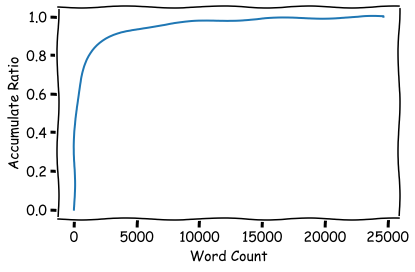

In [38]:
import matplotlib.pyplot as plt

ind = np.arange(0, 24678)
dif = np.diff(list(df[:][2])[50:])
dif2 = np.diff(list(df[:][2])[50:], n=2)

plt.xkcd()
plt.plot(ind, list(df[:][2]))
plt.xlabel('Word Count')
plt.ylabel('Accumulate Ratio')

# plt.show()
plt.tight_layout()
plt.savefig('ratio.png')
# plt.hlines(0.8, 0, 20000)
# plt.hlines(0.925, 0, 20000)
# plt.hlines(0.99, 0, 20000)


(0, 0.0005)

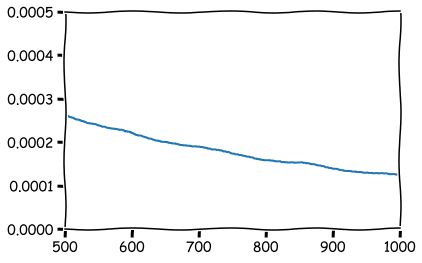

In [18]:
plt.plot(dif)
plt.xlim((500, 1000))
plt.ylim(0, 0.0005)